In [3]:
from utils_plots import roc_from_histos
from utils_plots import dijet_xsweights_dict
from utils_plots import assign_weights
from utils_plots import make_rocs
from utils_plots import make_efficiencies
from utils_plots import make_efficiencies_3var
from utils_plots import mass_sigeff
from utils_plots import get_wp_th1
from utils_plots import mass_bgrej
from utils_plots import get_eff_score
from utils_plots import wp50_cut
from utils_plots import get_wp_tag
from utils_plots import tagger_scores
from utils_plots import scores_separation
from utils_plots import mass_sculpting
from utils_plots import mass_sculpting_ptcut
from utils_plots import pt_spectrum
from utils_plots import pt_bgrej
from utils_plots import pt_sigeff
from utils_plots import weights
from utils_plots import trivar_scores
from utils_plots import getANNROCresults
from utils_plots import JSD
from scipy.stats import entropy
import ROOT as root
import numpy as np
import uproot
from root_numpy import fill_hist  as fh
from root_numpy import array2hist as a2h
from root_numpy import hist2array as h2a
import warnings
warnings.filterwarnings('ignore')

Welcome to JupyROOT 6.22/08


In [8]:
taggers = {}
tagger_files = {}
#tagger_files["LundNet_class"] = "/Users/mykola/Physics/LundTagger/LScores/scores_newclass.root"
#tagger_files["LundNet_adv"] = "/Users/mykola/Physics/LundTagger/LScores/scores_newclass_adv.root"
#tagger_files["Lund_Classifier"] = "/Users/mykola/Physics/LundTagger/LScores/scores_weightclas.root"
#tagger_files["LundNet_adv005"] = "/Users/mykola/Physics/LundTagger/LScores/scores_adv_0.05705.root"
#tagger_files["Lund_Class_w_adversarial"] = "/Users/mykola/Physics/LundTagger/LScores/scores_weightadv.root"
#tagger_files["LundNet_adv17"] = "/Users/mykola/Physics/LundTagger/LScores/scores_adv17.root"
#tagger_files["LundNet_adv026"] = "/Users/mykola/Physics/LundTagger/LScores/scores_adv_0.2619.root"
#tagger_files["LundNet_adv01"] = "/Users/mykola/Physics/LundTagger/LScores/scores_LundNet_adv_0.21338.root"

#tagger_files["LundNet_adv-0.08"] = "/Users/mykola/Physics/LundTagger/LScores/score_LundNet_weig_sc_0.08.root"
#tagger_files["LundNet_adv019"] = "/Users/mykola/Physics/LundTagger/LScores/scores_LundNet_advao_0.19344.root"

#tagger_files["LundNet_adv02"] = "/Users/mykola/Physics/LundTagger/LScores/scores_LundNet_advao_0.135169.root"
#tagger_files["LundNet_adv059"] = "/Users/mykola/Physics/LundTagger/LScores/scores_adv_0.59639.root"
tagger_files["LundNet_class"] = "/eos/user/t/tmlinare/Lund_tagger/ljptagger/Models/root_score/user.rvinasco.30879688._000003.tree.root_test.root_score_LundNetScores.root"
#tagger_files["LundNet_class"] = "/Users/mykola/Physics/LundTagger/LScores/scores_LundNet_class.root"
#tagger_files["LundNet_weighted"] = "/Users/mykola/Physics/LundTagger/LScores/LundNet_wei.root"
#tagger_files["LundNet_weighted_scaled"] = "/Users/mykola/Physics/LundTagger/LScores/score_LundNet_weig_sc_0.21338.root"
#tagger_files["PNA_class"] = "/Users/mykola/Physics/LundTagger/LScores/scores_PNA_class_0.16732.root"
#tagger_files["DNN_class"] = "/Users/mykola/Physics/LundTagger/LScores/scores_dnn_class.root"
#tagger_files["PNA_class_3"] = "/Users/mykola/Physics/LundTagger/LScores/scores_PNA_class_0.18264.root"
#tagger_files["LundNet_adv09"] = "/Users/mykola/Physics/LundTagger/LScores/scores_jsd09.root"
#tagger_files["LundNet_adv-1.96"] = "/Users/mykola/Physics/LundTagger/LScores/scores_adv_-1.96.root"



In [39]:
print(taggers["3var"].signal_tagged.no_weight.sum()/taggers["3var"].signal.no_weight.sum())
print(taggers["3var"].bg.no_weight.sum()/taggers["3var"].bg_tagged.no_weight.sum())

0.5071687
57.018414


In [38]:
print(taggers["3var"].signal_tagged.flat_weight.sum()/taggers["3var"].signal.flat_weight.sum())
print(taggers["3var"].bg.flat_weight.sum()/taggers["3var"].bg_tagged.flat_weight.sum())

0.5067866893402095
54.79705015420947


In [20]:
print(taggers["3var"].signal_tagged.chris_weight.sum()/taggers["3var"].signal.chris_weight.sum())
print(taggers["3var"].bg.chris_weight.sum()/taggers["3var"].bg_tagged.chris_weight.sum())

0.5072431
40.86972


In [ ]:
print(taggers["LundNet_class"].signal_tagged.chris_weight.sum()/taggers["LundNet_class"].signal.chris_weight.sum())
print(taggers["LundNet_class"].bg.chris_weight.sum()/taggers["LundNet_class"].bg_tagged.chris_weight.sum())

In [ ]:
print(len(taggers["LundNet_class"].signal_tagged)/len(taggers["LundNet_class"].signal))
print(len(taggers["LundNet_class"].bg)/len(taggers["LundNet_class"].bg_tagged))

In [15]:
print(len(taggers["3var"].signal_tagged)/len(taggers["3var"].signal))
print(len(taggers["3var"].bg)/len(taggers["3var"].bg_tagged))

0.5071686883064808
57.0184113068547


In [ ]:
taggers["LundNet_adv02"].signal.flat_weight

In [9]:
trivar_tagger = trivar_scores("3var","/Users/mykola/Physics/LundTagger/LScores/scores_3var.root")

for t in tagger_files:
    taggers[t] = tagger_scores(t,tagger_files[t])
taggers["3var"] = trivar_tagger

3var
signal ratio: 0.5071686883064808
bg ratio: 0.01753819471781356
LundNet_adv-0.08
signal ratio: 0.6699758116551507
bg ratio: 0.11812979703519244
LundNet_adv02
signal ratio: 0.7529208669327601
bg ratio: 0.0755261058331961
LundNet_class
signal ratio: 0.8456061082595956
bg ratio: 0.03643019747396291


In [ ]:
h_sig_inv = root.TH1D (f"h_sig_inv",f"h_sig_inv",nbins,0,3000)

for n in range (nbins):
    if h_sig_tot.GetBinContent(n):
        h_sig_inv.SetBinContent(n, 1/h_sig_tot.GetBinContent(n))
    else:
        h_sig_inv.SetBinContent(n, 0)

In [ ]:
inFile = root . TFile . Open ( "flat_weights_tr.root" ," READ ")
flat_bg = inFile.Get("bg_inv")
flat_sig = inFile.Get("h_sig_inv")

def get_flat_weight(tagger,wp):
    
    print (tagger.name)

    def get_flat_weight(pt,dsid):
        if dsid > 370000:
            return flat_sig.GetBinContent(flat_sig.FindBin(pt))
        else:
             return flat_bg.GetBinContent(flat_bg.FindBin(pt))

    tagger.scores["flat_weights"] = np.vectorize(score_cut)(tagger.scores.fjet_pt)
    tagger.signal = tagger.scores[tagger.scores.EventInfo_mcChannelNumber>370000]
    tagger.bg = tagger.scores[tagger.scores.EventInfo_mcChannelNumber<370000]

    tagger.bg_tagged = tagger.bg[tagger.bg.fjet_nnscore > tagger.bg.tag_cut]
    tagger.bg_untagged = tagger.bg[tagger.bg.fjet_nnscore < tagger.bg.tag_cut]
    tagger.signal_tagged = tagger.signal[tagger.signal.fjet_nnscore > tagger.signal.tag_cut]
    


In [ ]:
for t in taggers:
    if taggers[t].name == "3var":
        continue
    get_wp_tag(taggers[t],0.52)

In [10]:
for t in taggers:
    if taggers[t].name == "3var":
        continue
    get_wp_th1(taggers[t],0.5)

LundNet_adv-0.08
LundNet_adv02
LundNet_class


In [ ]:


def GetPtWeight( dsid, pt):
    scale_factor = 1
    if dsid > 370000:
        arr = flatweights_sig
    else:
        arr = flatweights_bg
        scale_factor = 14.475606 #balancing out the weight integral
    n = -1
    for el in arr[1]:
        if pt > el:
            n+=1
            continue
        else:
            break
    if pt>arr[1][-1]:
        return 0
    return arr[0][n]*scale_factor*10**4

In [24]:
import matplotlib.pyplot as plt

def make_efficiencies_3var(taggers):
    plt.figure(figsize=(16,12))

    for t in taggers:
        if taggers[t].name == "3var":
            continue
        tprs, fprs, auc = taggers[t].get_roc()
        print (len(tprs)) 
        plt.semilogy(tprs, 1/fprs, label="{0}".format(taggers[t].name))

    plt.semilogy(getANNROCresults("x", "NN"), getANNROCresults("y", "NN"), 'r-', label='z$_{NN}$')
    plt.semilogy(getANNROCresults("x", "ANN"), getANNROCresults("y", "ANN"), 'b-', label='z$_{ANN}^{\lambda=10}$')
    plt.semilogy(0.5072431, 40.86972, 'ro', label='3-var' )
    plt.xlim(0.2, 1)
    plt.semilogy(np.linspace(0, 1, 100),1/np.linspace(0, 1, 100),'k--',label="Random guessing")
    plt.xlim(0.0, 1.0)
    plt.ylim(1, 10e4)
    plt.title("QCD rejection vs. W tagging efficiency")
    plt.xlabel("Signal efficiency")
    plt.ylabel("Background rejection")

    #tprs, fprs, auc = roc_from_histos(h_signal, h_bg)

    plt.legend(prop={'size': 15})
    plt.savefig("w_cor_uncor1",dpi=500)
    plt.show()


In [4]:
taggers

{}

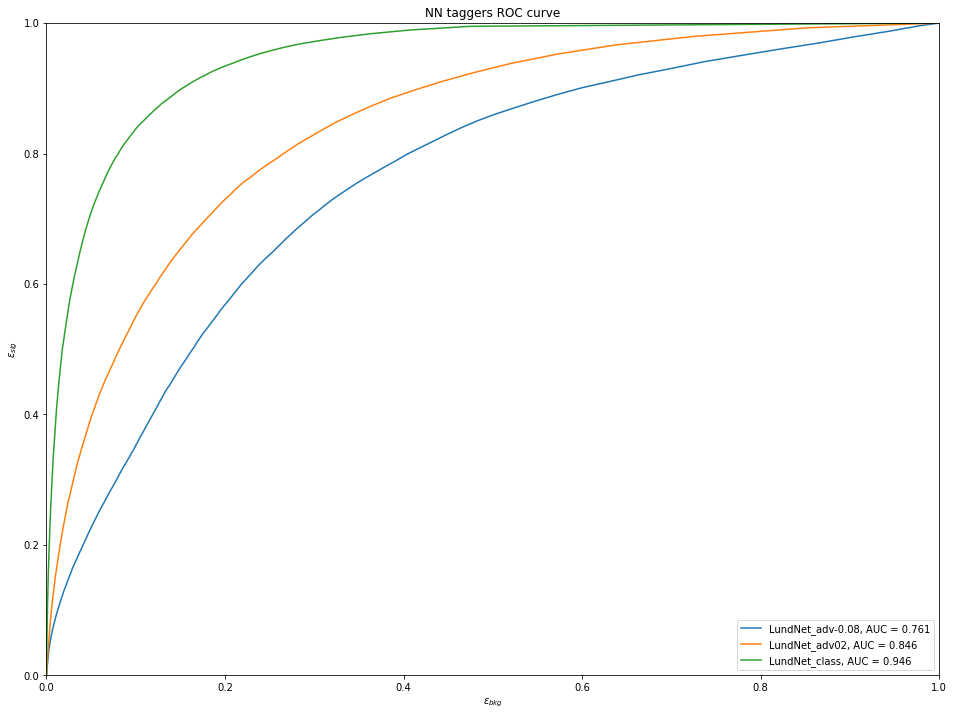

501
501
501


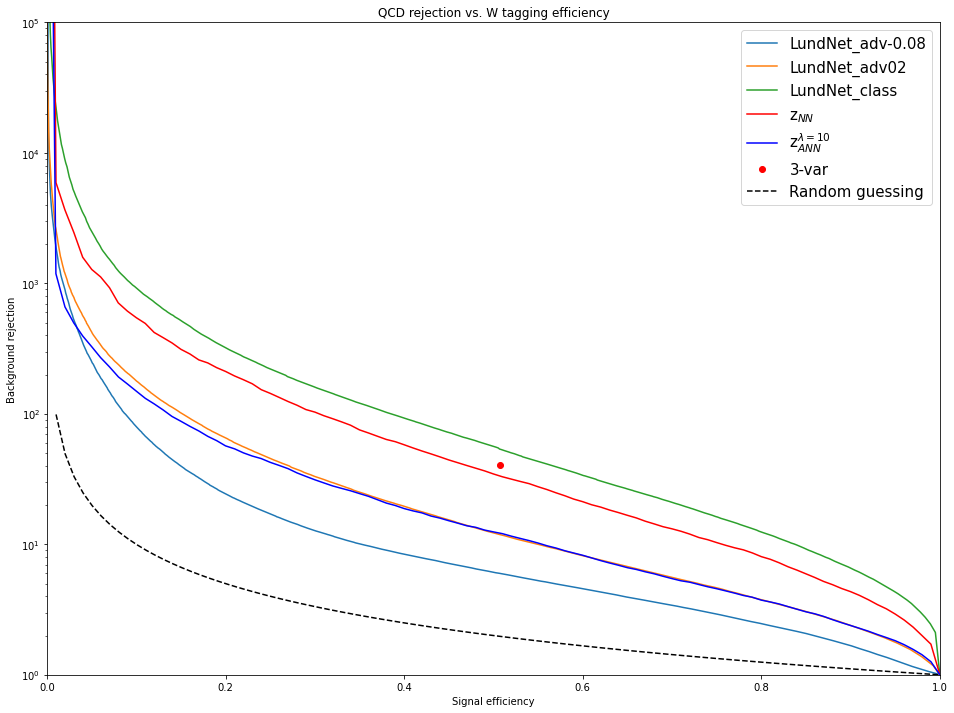

In [25]:
make_rocs(taggers)
make_efficiencies_3var(taggers)

In [ ]:
np.ones_like(taggers["LundNet_adv02"].bg_tagged.flat_weight)

In [ ]:
len(taggers["LundNet_adv02"].bg_tagged.flat_weight)

In [ ]:
pt_spectrum(taggers,"chris_weight")

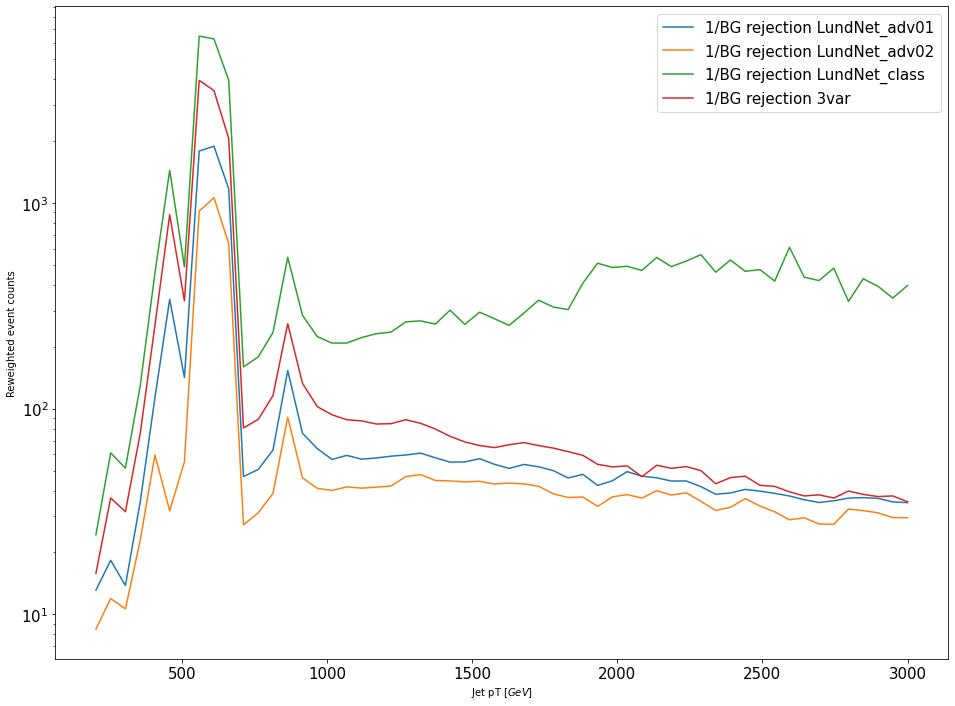

In [11]:
pt_bgrej(taggers,"xsec_weight")

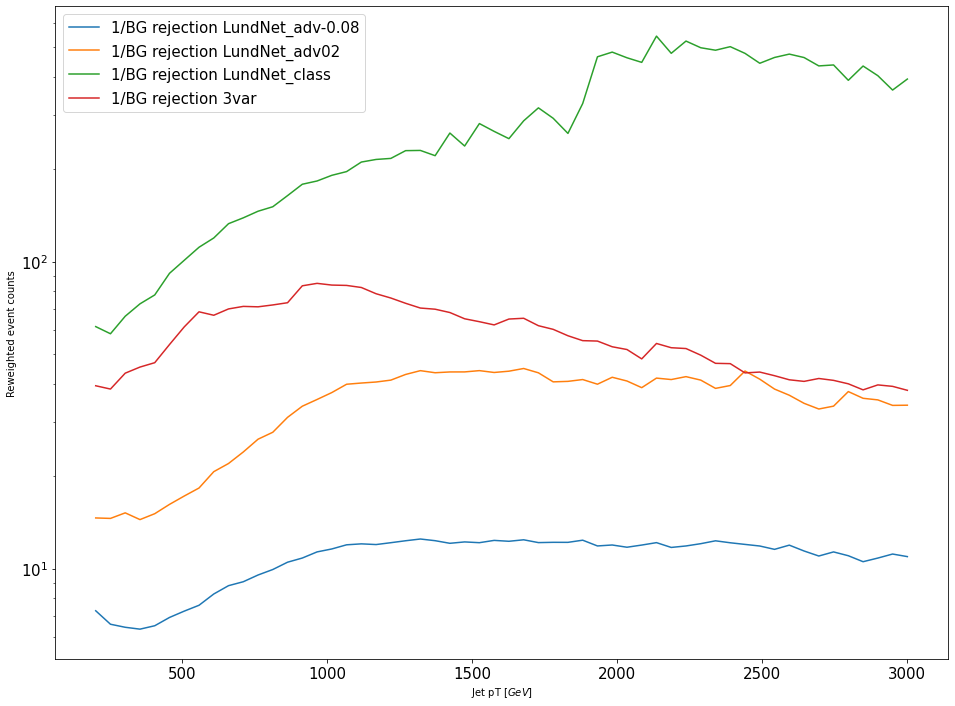

In [22]:
pt_bgrej(taggers,"no_weight")

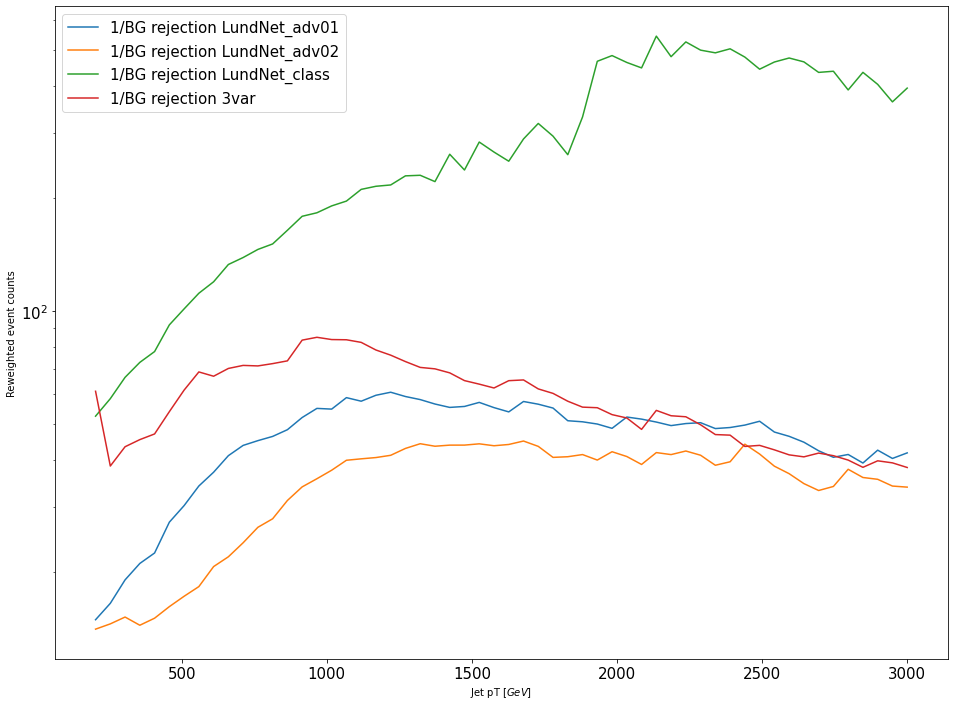

In [13]:
pt_bgrej(taggers,"flat_weight")

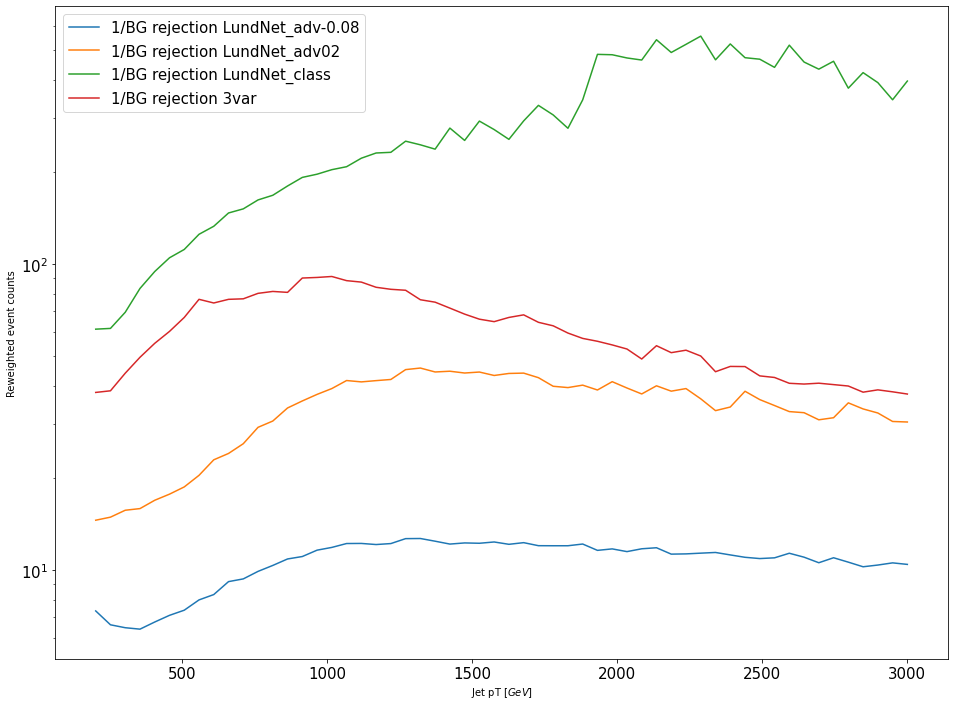

Warning in <TFile::Append>: Replacing existing TH1: bg_total (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bg_3var (Potential memory leak).


In [23]:
pt_bgrej(taggers)

sig eff mean: 0.49296937761527165
sig eff mean: 0.49209307536016483
sig eff mean: 0.47023588700770474
sig eff mean: 0.5077859138572243


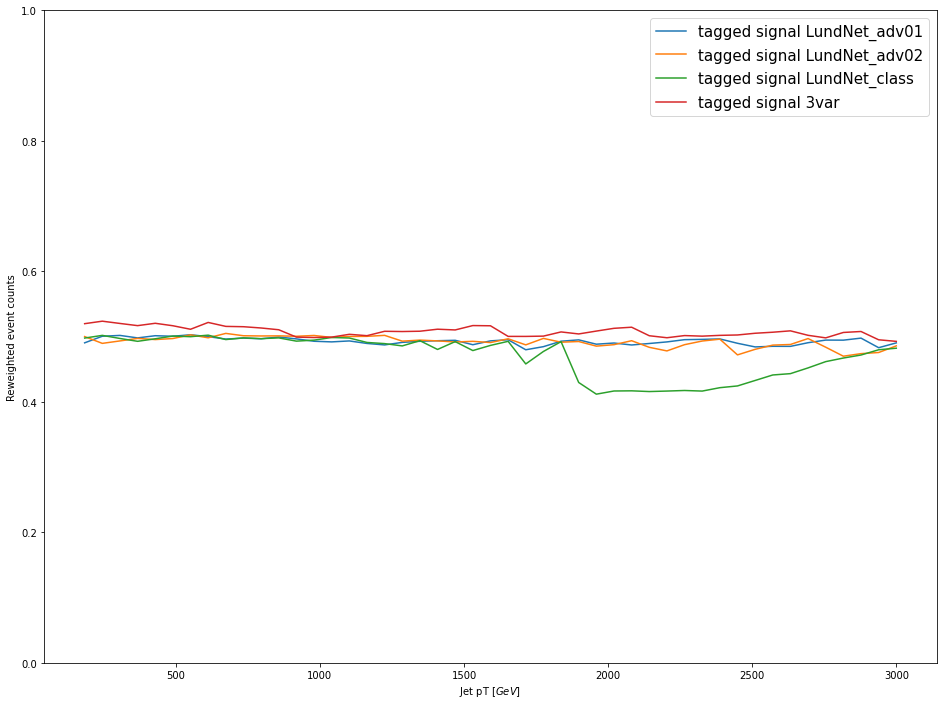

Warning in <TFile::Append>: Replacing existing TH1: sig_total (Potential memory leak).


In [19]:
pt_sigeff(taggers,"no_weight")

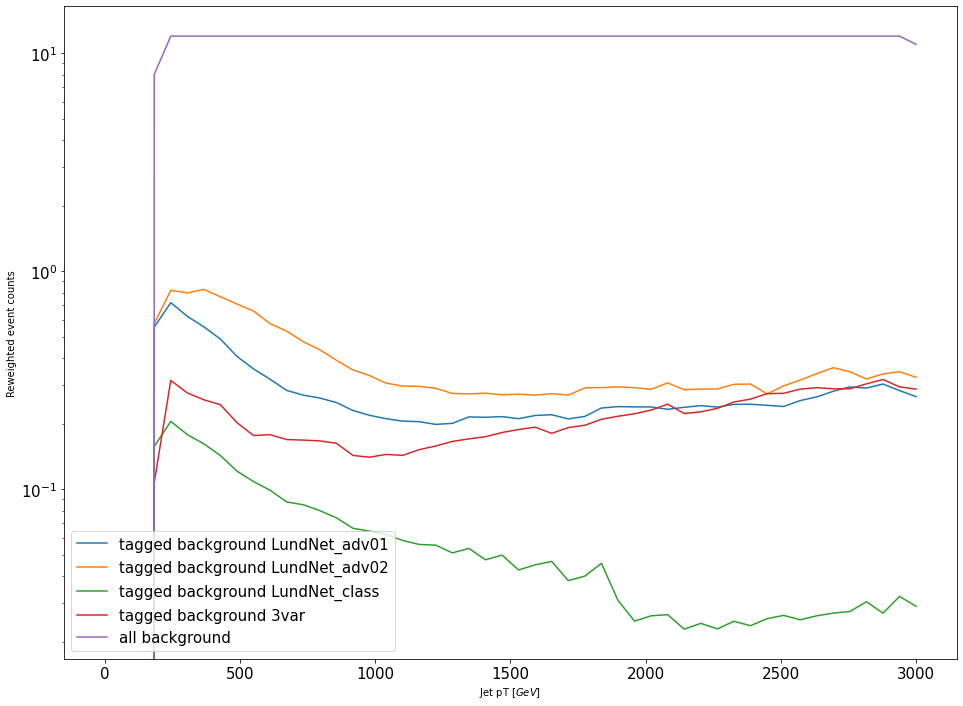

In [20]:
pt_spectrum(taggers,"flat_weight")

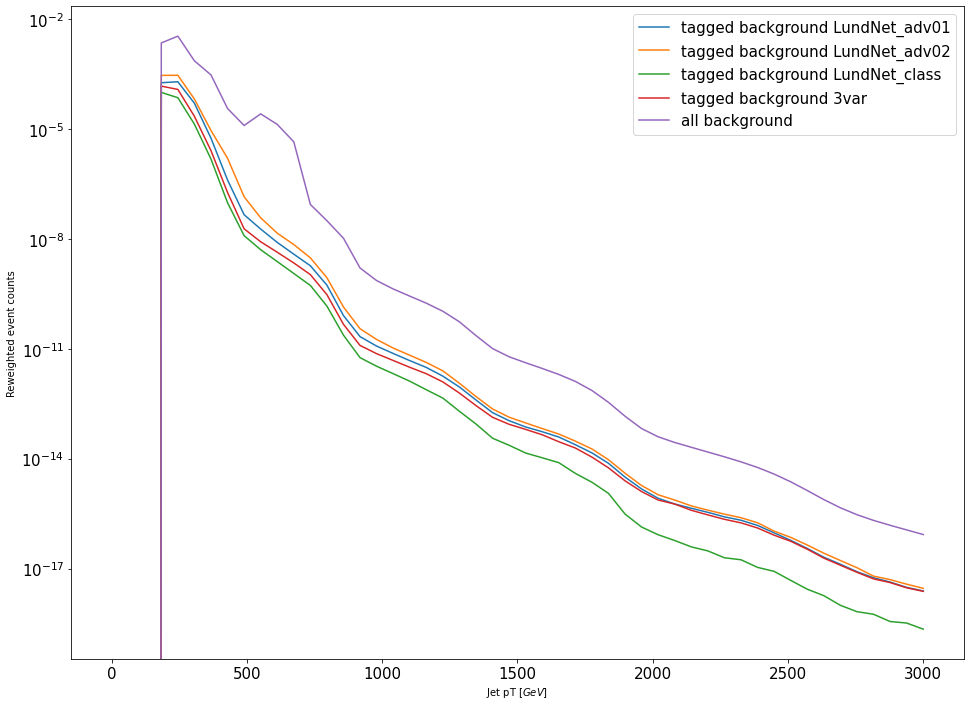

Warning in <TFile::Append>: Replacing existing TH1: bg_total (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bg_LundNet_adv01 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bg_LundNet_adv02 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bg_LundNet_class (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bg_3var (Potential memory leak).


In [21]:
pt_spectrum(taggers,"xsec_weight")

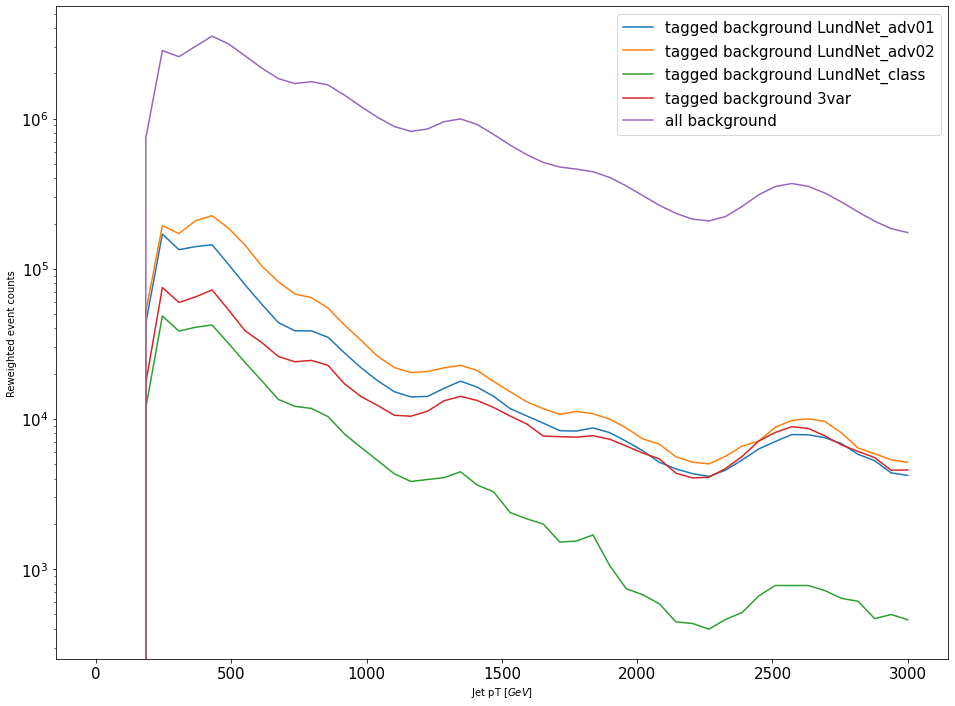

Warning in <TFile::Append>: Replacing existing TH1: bg_total (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bg_LundNet_adv01 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bg_LundNet_adv02 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bg_LundNet_class (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bg_3var (Potential memory leak).


In [23]:
pt_spectrum(taggers,"no_weight")

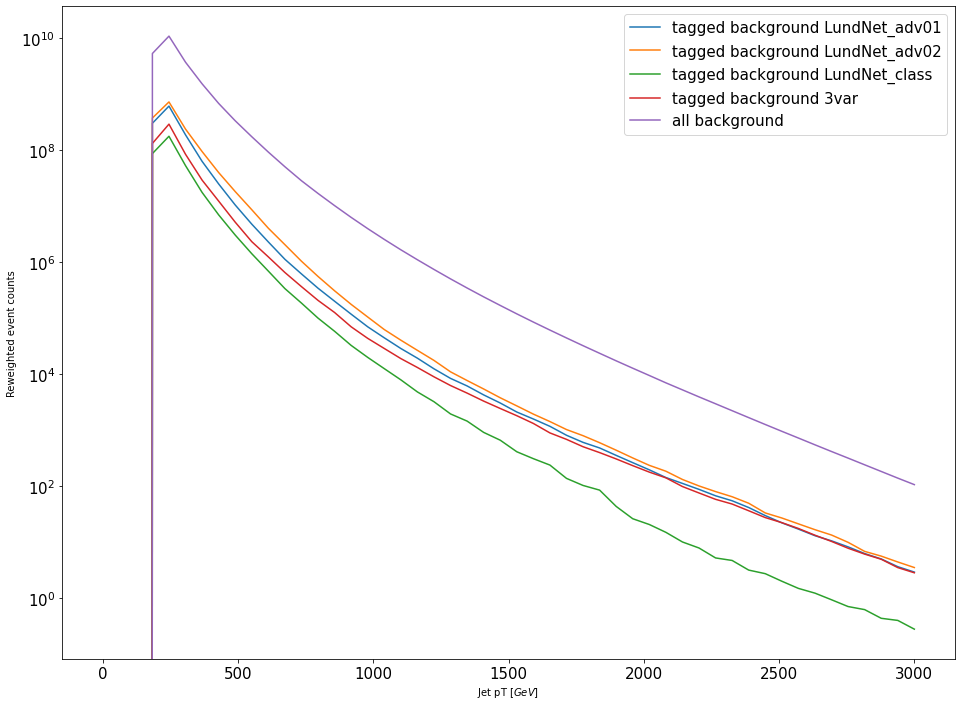

Warning in <TFile::Append>: Replacing existing TH1: bg_total (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bg_3var (Potential memory leak).


In [25]:
pt_spectrum(taggers)

sig eff mean: 0.2013640350501608
sig eff mean: 0.27369809652222526
sig eff mean: 0.2326976981433726
sig eff mean: 0.10853275346334616


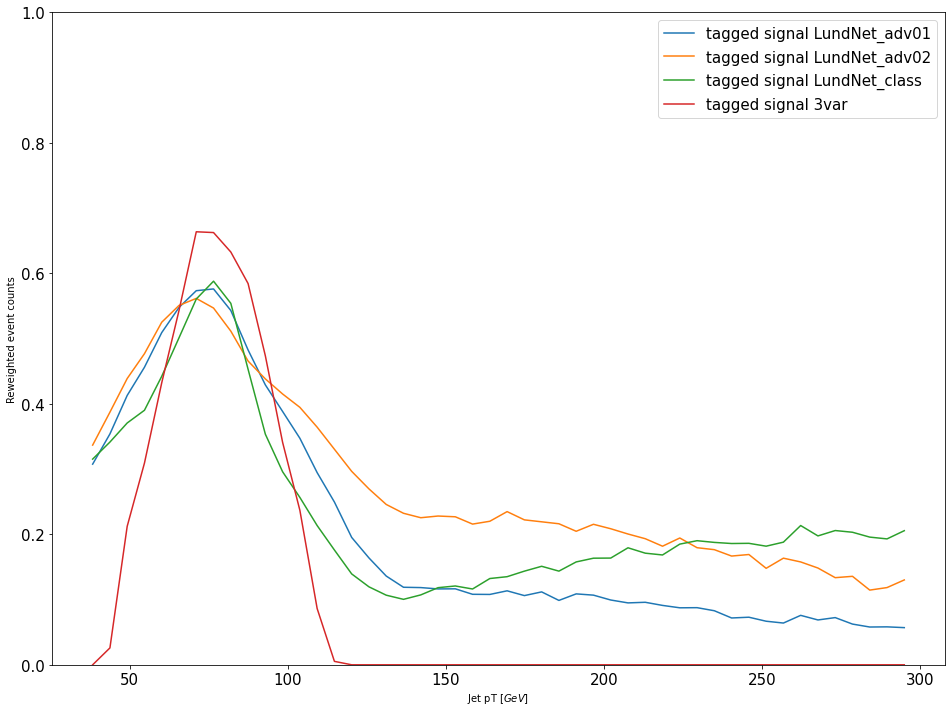

Warning in <TFile::Append>: Replacing existing TH1: sig_total (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: sig_3var (Potential memory leak).


In [25]:
mass_sigeff(taggers,"flat_weight")

sig eff mean: 0.20272387690333274
sig eff mean: 0.2743938513212819
sig eff mean: 0.23423291687288683
sig eff mean: 0.10857780013479273


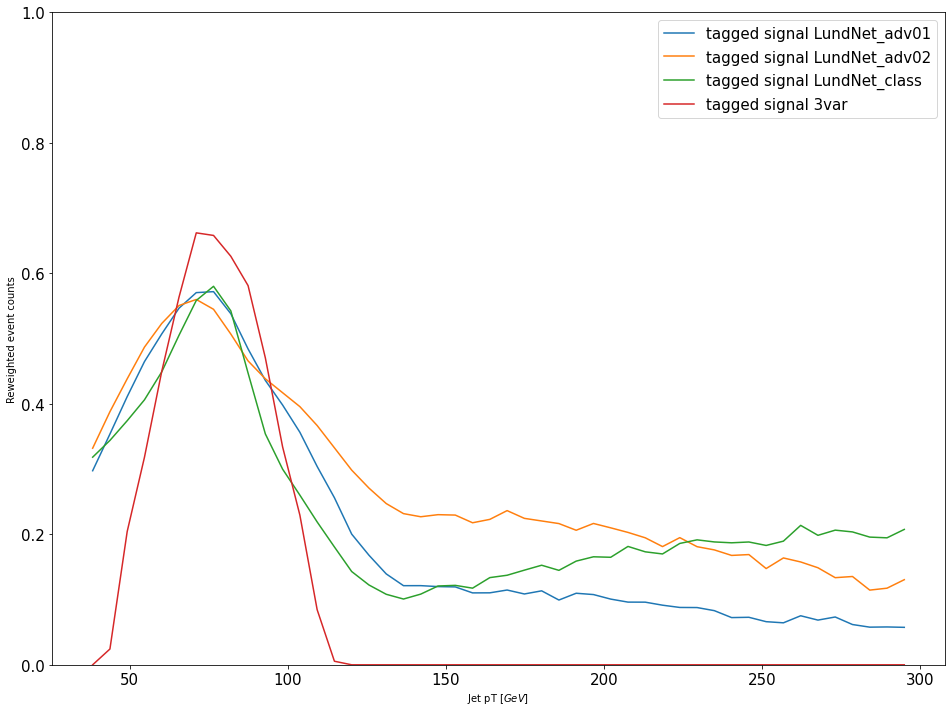

Warning in <TFile::Append>: Replacing existing TH1: sig_total (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: sig_3var (Potential memory leak).


In [30]:
mass_sigeff(taggers,"no_weight")

sig eff mean: 0.20272387690333274
sig eff mean: 0.2743938513212819
sig eff mean: 0.23423291687288683
sig eff mean: 0.10857780013479273


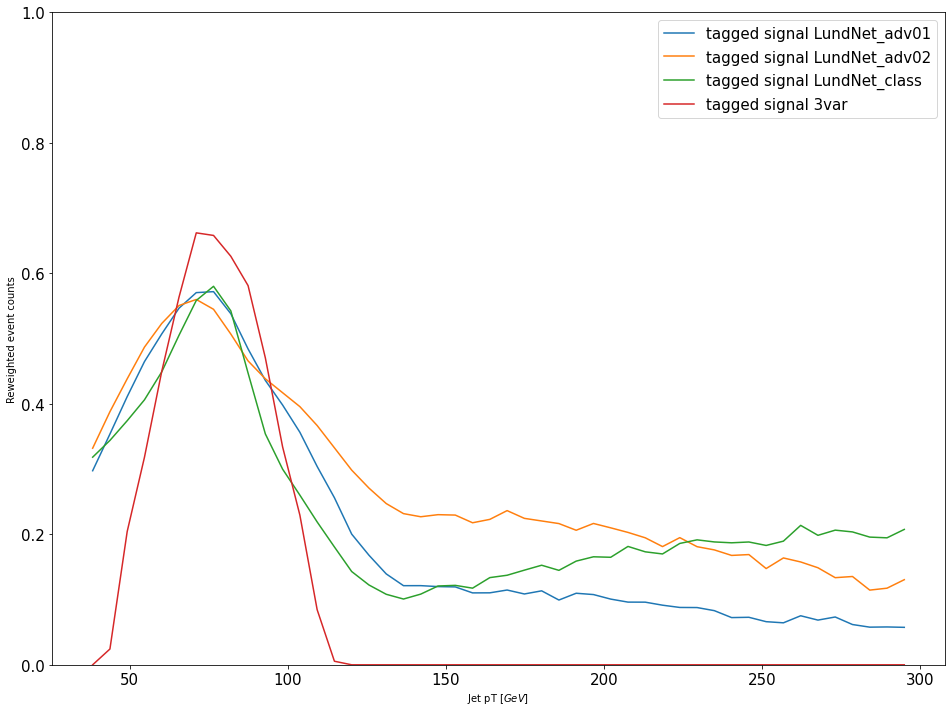

Warning in <TFile::Append>: Replacing existing TH1: sig_total (Potential memory leak).


In [31]:
mass_sigeff(taggers,"xsec_weight")

sig eff mean: 0.17734694919634666
sig eff mean: 0.24095288276962804
sig eff mean: 0.13118320198717337
sig eff mean: 0.09015681183708242


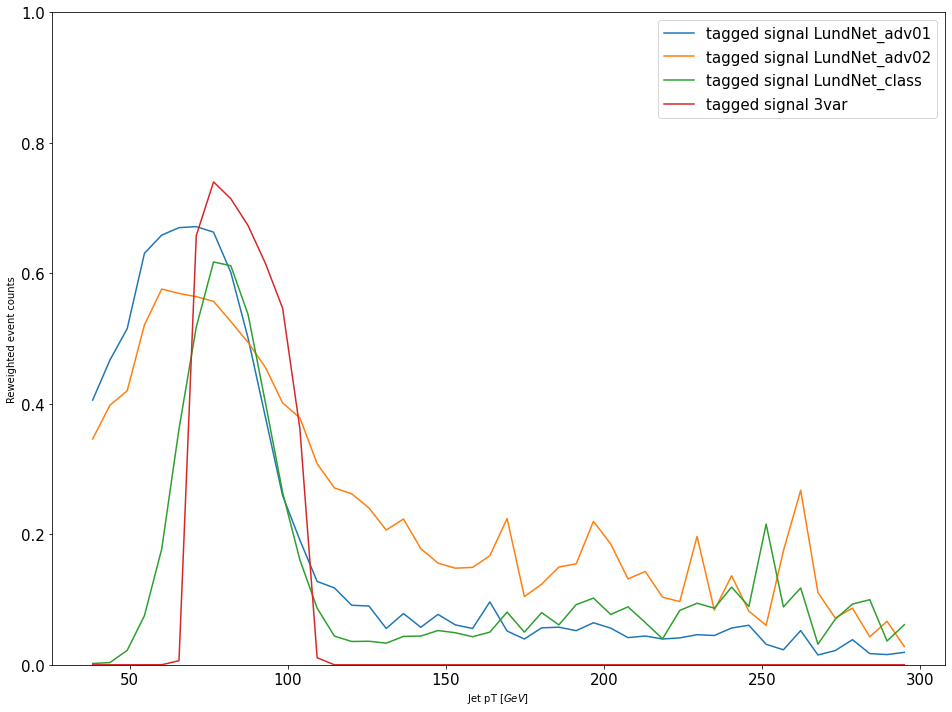

In [24]:
mass_sigeff(taggers)

In [ ]:
import matplotlib.pyplot as plt


    

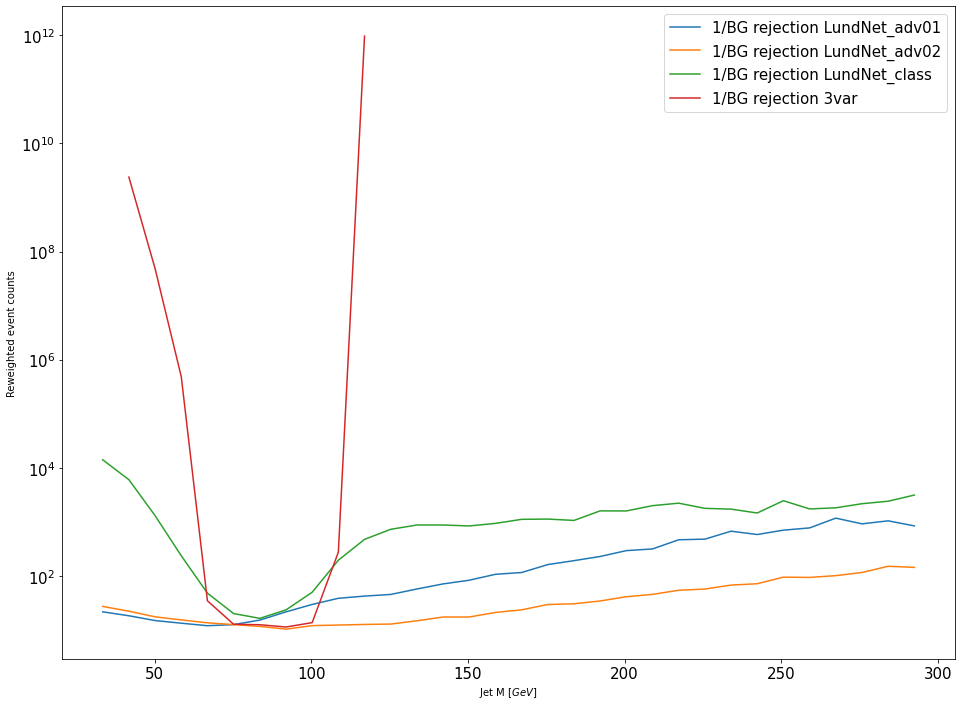

Warning in <TFile::Append>: Replacing existing TH1: bg_total (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bg_3var (Potential memory leak).


In [33]:
mass_bgrej(taggers)

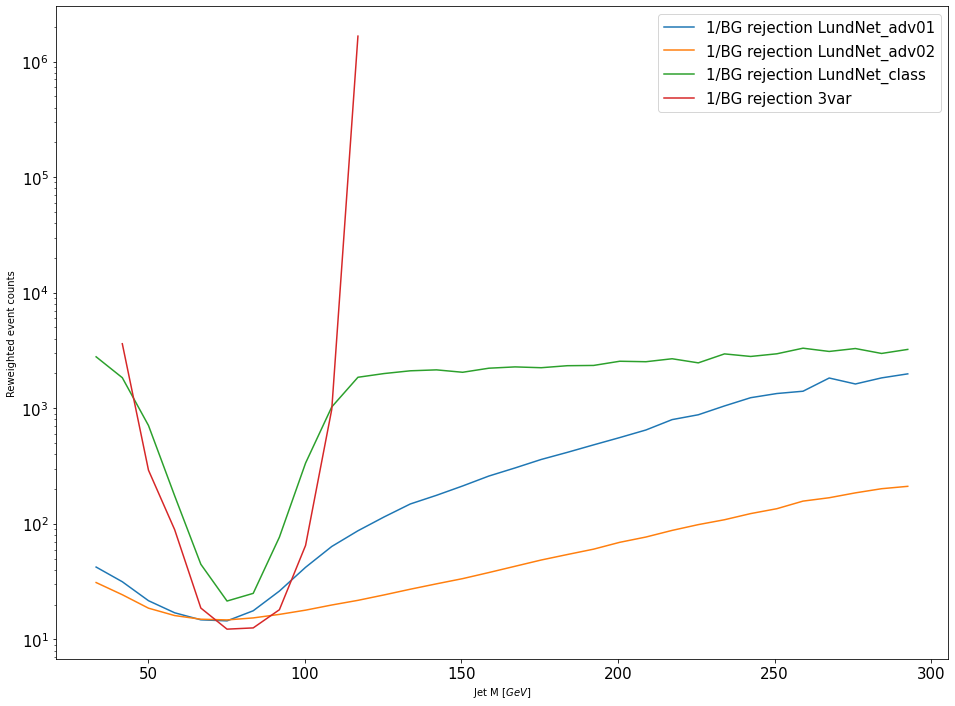

Warning in <TFile::Append>: Replacing existing TH1: bg_total (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bg_3var (Potential memory leak).


In [34]:
mass_bgrej(taggers,"no_weight")

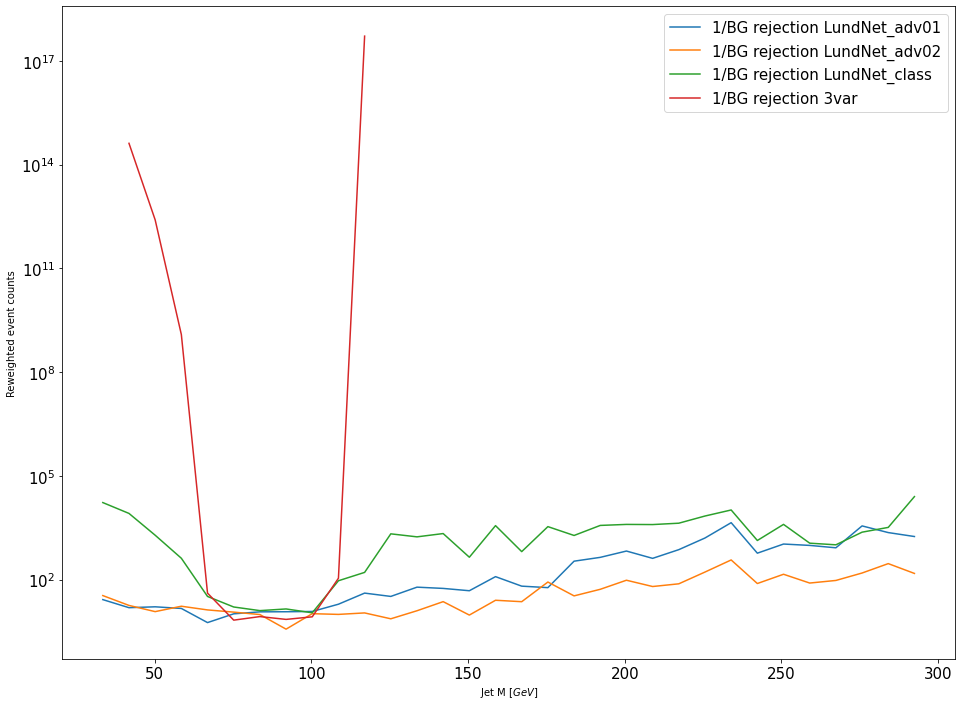

Warning in <TFile::Append>: Replacing existing TH1: bg_total (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bg_3var (Potential memory leak).


In [35]:
mass_bgrej(taggers,"xsec_weight")

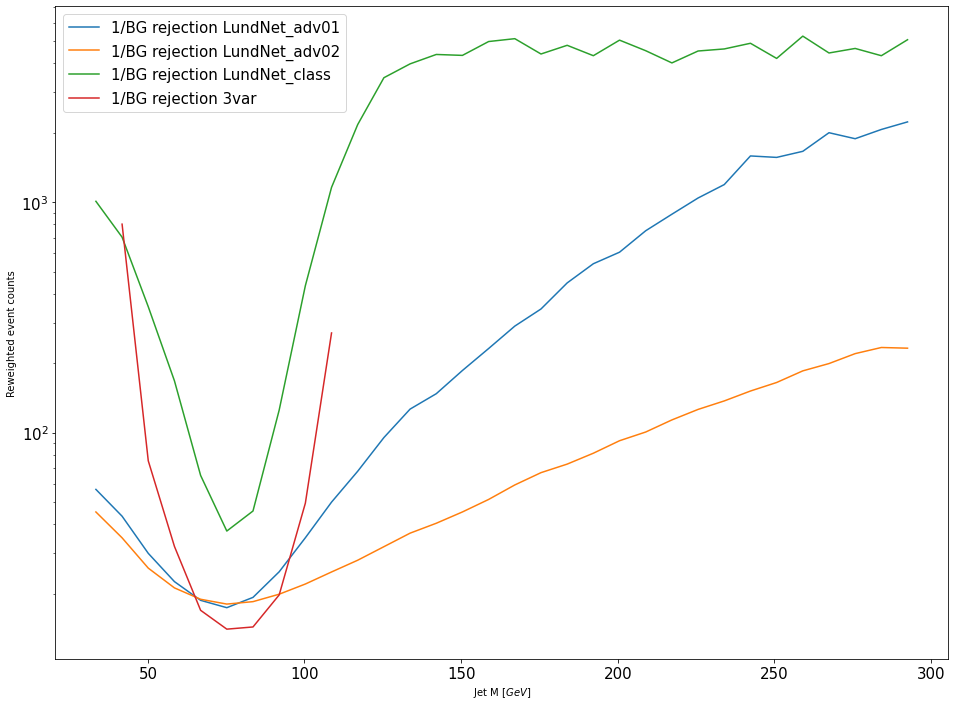

In [32]:
mass_bgrej(taggers,"flat_weight")

In [ ]:
print(taggers["LundNet_class"].signal_tagged.chris_weight.sum()/taggers["LundNet_class"].signal.chris_weight.sum())
print(taggers["LundNet_class"].bg.chris_weight.sum()/taggers["LundNet_class"].bg_tagged.chris_weight.sum())

In [9]:
import matplotlib.pyplot as plt

def make_efficiencies_pt(taggers, minpt, maxpt,weight="chris_weight"):
    plt.figure(figsize=(16,12))
    
    for t in taggers:
        if taggers[t].name == "3var":
            bg_tag = taggers[t].bg_tagged[taggers[t].bg.fjet_pt < maxpt ][taggers[t].bg.fjet_pt > minpt ]
            bg_all = taggers[t].bg[taggers[t].bg.fjet_pt < maxpt ][taggers[t].bg.fjet_pt > minpt ]
            signal_tag = taggers[t].signal_tagged[taggers[t].signal.fjet_pt < maxpt ][taggers[t].signal.fjet_pt > minpt ]
            signal = taggers[t].signal[taggers[t].signal.fjet_pt < maxpt ][taggers[t].signal.fjet_pt > minpt ]
            
            sig_eff = (signal_tag[weight].sum())/signal[weight].sum()
            bg_eff = (bg_all[weight].sum())/(bg_tag[weight].sum())
            plt.semilogy(sig_eff, bg_eff, 'ro', label='3-var' )
            print ("sig_eff",sig_eff,"bg_eff",bg_eff)

        else:
            bg_all = taggers[t].bg[taggers[t].bg.fjet_pt < maxpt ][taggers[t].bg.fjet_pt > minpt ]
            signal = taggers[t].signal[taggers[t].signal.fjet_pt < maxpt ][taggers[t].signal.fjet_pt > minpt ]
            h_signal = root.TH1D (f"signal{taggers[t].name}",f"signal{taggers[t].name}",500,0,1)
            h_bg = root.TH1D (f"bg{taggers[t].name}",f"bg{taggers[t].name}",500,0,1)
            fh(h_signal,signal["fjet_nnscore"],signal[weight])
            fh(h_bg,bg_all["fjet_nnscore"],bg_all[weight])
            tprs, fprs, auc, tpr_wp, fpr_wp = roc_from_histos(h_signal, h_bg,0.5)
            plt.semilogy(tprs, 1/fprs, label="{0}".format(taggers[t].name))
    
    plt.semilogy(np.linspace(0, 1, 100),1/np.linspace(0, 1, 100),'k--',label="Random guessing")
    plt.xlim(0.0, 1.0)
    plt.ylim(1, 1e5)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title("QCD rejection vs. W tagging efficiency")
    plt.xlabel("Signal efficiency")
    plt.ylabel("Background rejection")
    plt.legend(fontsize=20)
    plt.text(0.2, 10e3, f"{minpt} < pT < {maxpt}", fontsize=20)    

    plt.show()


sig_eff 0.50711197 bg_eff 40.404686


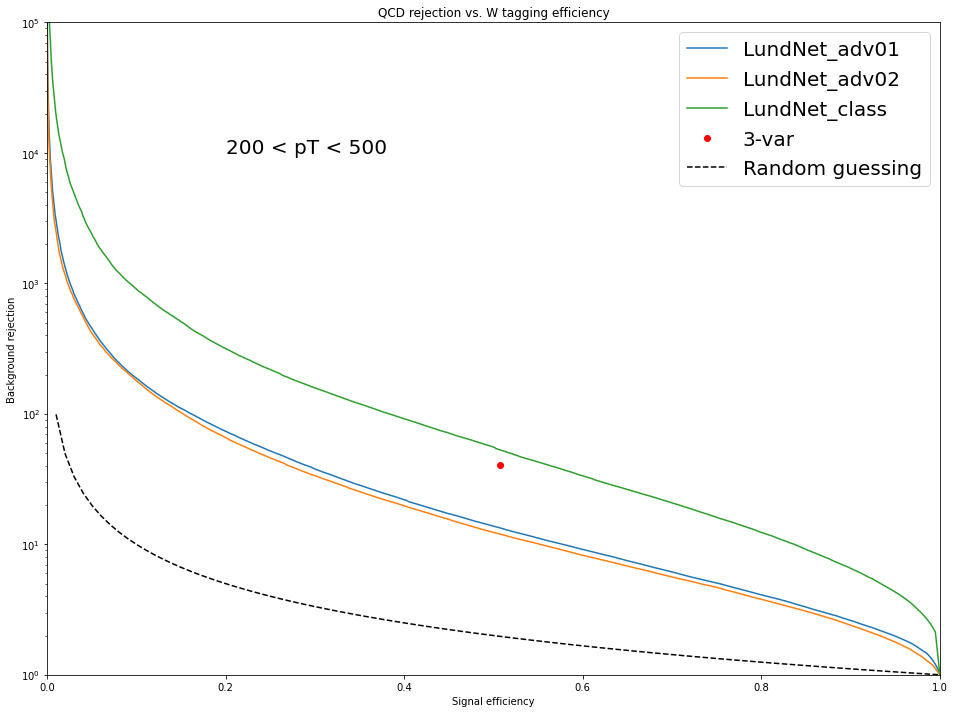

Warning in <TFile::Append>: Replacing existing TH1: signalLundNet_adv01 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bgLundNet_adv01 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: signalLundNet_adv02 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bgLundNet_adv02 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: signalLundNet_class (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bgLundNet_class (Potential memory leak).


In [27]:
make_efficiencies_pt(taggers,200,500)

In [ ]:
for t in taggers:
    if taggers[t].name == "3var":
        continue
    scores_separation(taggers[t])

# make_rocs

In [ ]:
import matplotlib.pyplot as plt



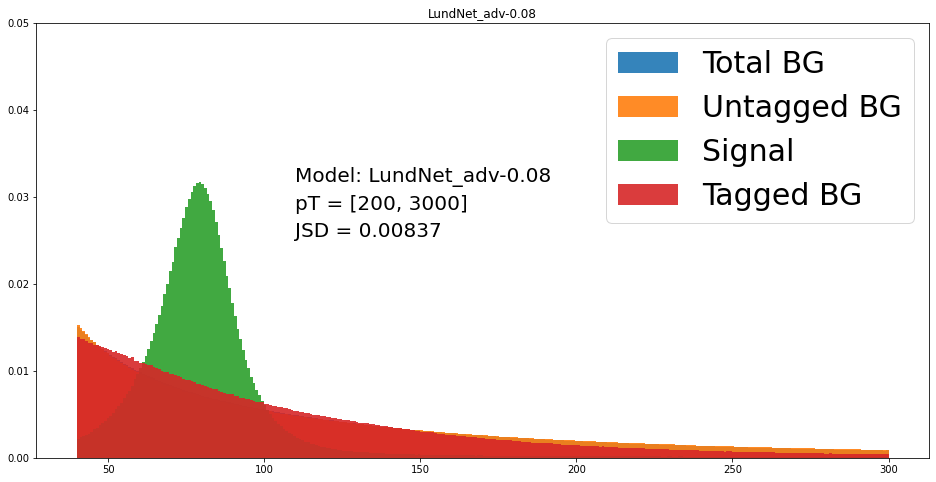

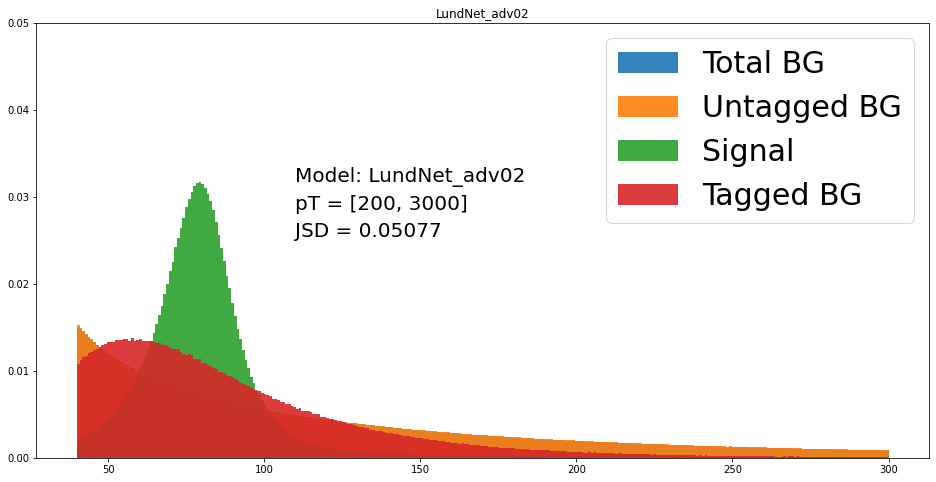

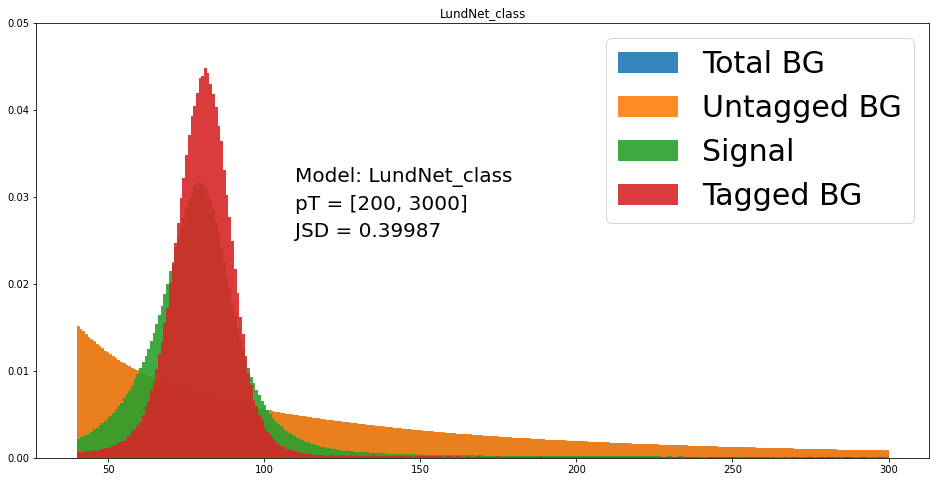

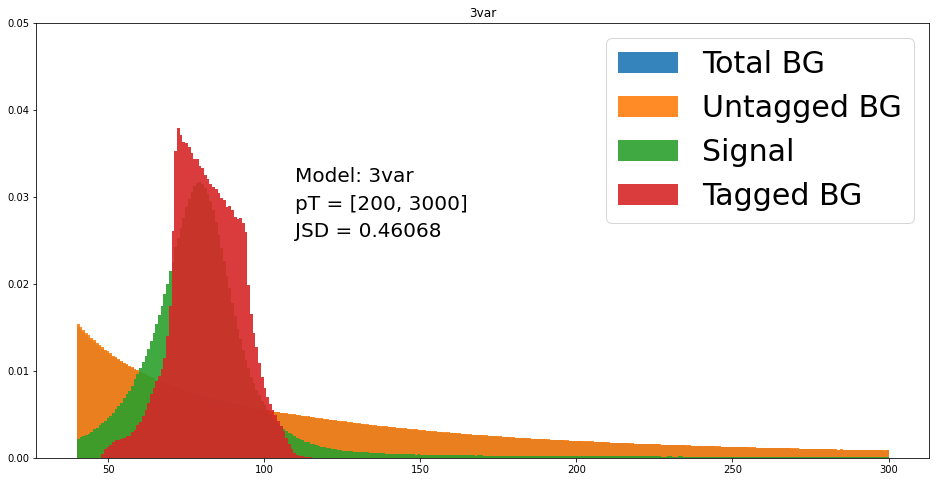

In [17]:
MASSBINS = np.linspace(40, 300, (300 - 40)//5 + 1, endpoint=True)
import matplotlib.pyplot as plt
from scipy.stats import entropy

def JSD (P, Q, base=2):
    
    p = P / np.sum(P)
    q = Q / np.sum(Q)
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m, base=base) + entropy(q, m, base=base))


def mass_sculpting(tagger, weight="chris_weight"):
    plt.figure(figsize=[16,8])
    kwargs = dict(alpha = 0.9, bins = 300, density = True, stacked = True,range=(40,300))

    plt.title(label=tagger.name, fontdict=None, loc='center', pad=None)

    plt.title(label=tagger.name, fontdict=None, loc='center', pad=None)

    plt.hist(tagger.bg["fjet_m"], ** kwargs, weights = tagger.bg[weight], label="Total BG")
    plt.hist(tagger.bg_untagged["fjet_m"], ** kwargs, weights = tagger.bg_untagged[weight],  label="Untagged BG")
    y, x,_ = plt.hist(tagger.signal["fjet_m"], ** kwargs, weights = tagger.signal[weight], label="Signal")
    plt.hist(tagger.bg_tagged["fjet_m"], ** kwargs, weights = tagger.bg_tagged[weight],  label="Tagged BG")

    p, _ = np.histogram(tagger.bg_untagged["fjet_m"], bins=MASSBINS, density=1.)
    f, _ = np.histogram(tagger.bg_tagged["fjet_m"], bins=MASSBINS, density=1.)
    jsd = JSD(p,f)
    
    plt.text(110, max(y), f"Model: {tagger.name}", fontsize=20)    
    plt.text(110, max(y)*0.9, f"pT = [200, 3000]", fontsize=20)    
    plt.text(110, max(y)*0.8, f"JSD = {round(jsd,5)}", fontsize=20)      
    
    plt.ylim((0,0.05))
    plt.legend(fontsize=30)
    plt.show()
    
for t in taggers:
    mass_sculpting(taggers[t],weight="no_weight")
#    scores_separation(taggers[t])


In [ ]:
import matplotlib.pyplot as plt

sig = taggers["LundNet_class"].signal["fjet_pt"]

h_signal_pt = root.TH1D (f"signal_pt",f"signal_pt",100,200,3000)
fh(h_signal_pt,sig)
plt.semilogy(np.linspace(0, 3000, 142), h_signal_pt, label="all background")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

bg = taggers["LundNet_class"].bg["fjet_pt"]

h_bg_pt = root.TH1D (f"bg_pt",f"bg_pt",100,200,3000)
#fh(h_bg_pt,bg,taggers["LundNet_class"].bg["xsec_weight"])
fh(h_bg_pt,bg)
plt.semilogy(np.linspace(0, 3000, 142), h_bg_pt, label="all background")
plt.show()


In [ ]:
h_signal_pt.Integral()


In [ ]:
c = root.TCanvas(f"myCanvasName",f"The Canvas Title",800,600)

h_signal_pt.Draw()
c.Draw()


In [ ]:
c = root.TCanvas(f"myCanvasName",f"The Canvas Title",800,600)

h_bg_pt.Draw()
c.Draw()


In [ ]:
fitfunc = root.TF1("fit", "pol7", 230, 3000) #exponential sigmoid fit (best so far)
fitfunc2 = root.TF1("fit2", "pol1", 201, 230) #exponential sigmoid fit (best so far)
#fitfunc = root.TF1("fit", "pol10", 200, 2700) #12th order polynomial fit 
h_signal_pt.Fit(fitfunc,"R,S")
h_signal_pt.Fit(fitfunc2,"R,S")

h_signal_pt.Draw()
c.Draw()


In [ ]:
c = root.TCanvas(f"myCanvasName",f"The Canvas Title",800,600)

fitfunc = root.TF1("fit", "pol10", 230, 3000) #exponential sigmoid fit (best so far)
#fitfunc = root.TF1("fit", "pol10", 200, 2700) #12th order polynomial fit 
h_bg_pt.Fit(fitfunc,"R,S")

h_bg_pt.Draw()
c.Draw()


In [ ]:
    gra = root.TGraph(len(pts), np.array(pts).astype("float"), np.array(scores).astype("float"))
    fitfunc = root.TF1("fit", "[p0]+[p1]/([p2]+exp([p3]*(x+[p4])))", 200, 2700) #exponential sigmoid fit (best so far)
    #fitfunc = root.TF1("fit", "pol10", 200, 2700) #12th order polynomial fit 
    gra.Fit(fitfunc,"R,S")
    c = root.TCanvas(f"myCanvasName{tagger.name}",f"The Canvas Title{tagger.name}",800,600)

    gra.Draw()

In [ ]:
#taggers["LundNet_class"].s1k = taggers["LundNet_class"].signal[(taggers["LundNet_class"].signal.fjet_pt < 1000)][taggers["LundNet_class"].signal.fjet_pt > 500]
#taggers["LundNet_class"].bg1k = taggers["LundNet_class"].bg[taggers["LundNet_class"].bg.fjet_pt < 1000 ][taggers["LundNet_class"].bg.fjet_pt > 500]
#taggers["LundNet_class"].s2k = taggers["LundNet_class"].signal[taggers["LundNet_class"].signal.fjet_pt < 500 ]
#taggers["LundNet_class"].bg2k = taggers["LundNet_class"].bg[taggers["LundNet_class"].bg.fjet_pt < 500 ]
#taggers["LundNet_class"].s3k = taggers["LundNet_class"].signal[taggers["LundNet_class"].signal.fjet_pt < 500 ]
#taggers["LundNet_class"].bg3k = taggers["LundNet_class"].bg[taggers["LundNet_class"].bg.fjet_pt < 500 ]


In [ ]:
taggers["LundNet_class"].s1k

In [ ]:
from scipy.stats import entropy

MASSBINS = np.linspace(40, 300, (300 - 40) // 5 + 1, endpoint=True)
def JSD (P, Q, base=2):
    """Compute Jensen-Shannon divergence (JSD) of two distribtions.
    From: [https://stackoverflow.com/a/27432724]

    Arguments:
        P: First distribution of variable as a numpy array.
        Q: Second distribution of variable as a numpy array.
        base: Logarithmic base to use when computing KL-divergence.

    Returns:
        Jensen-Shannon divergence of `P` and `Q`.
    """
    p = P / np.sum(P)
    q = Q / np.sum(Q)
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m, base=base) + entropy(q, m, base=base))

In [15]:

import matplotlib.pyplot as plt

def mass_sculpting_ptcut(tagger,minpt,maxpt, weight = "chris_weight"):
    plt.figure(figsize=[12,8])
    kwargs = dict(alpha = 0.9, bins = 300, density = True, stacked = True,range=(40,300))
    bg_all = tagger.bg[tagger.bg.fjet_pt < maxpt ][tagger.bg.fjet_pt > minpt ]
    signal = tagger.signal[tagger.signal.fjet_pt < maxpt ][tagger.signal.fjet_pt > minpt ]
    bgu = tagger.bg_untagged[tagger.bg_untagged.fjet_pt < maxpt ][tagger.bg_untagged.fjet_pt > minpt ]
    bgt = tagger.bg_tagged[tagger.bg_tagged.fjet_pt < maxpt ][tagger.bg_tagged.fjet_pt > minpt ]
    p, _ = np.histogram(bgu, bins=MASSBINS, density=1.)
    f, _ = np.histogram(bgt, bins=MASSBINS, density=1.)
    jsd = JSD(p,f)


    plt.title(label=tagger.name, fontdict=None, loc='center', pad=None)

    
    plt.hist(bg_all["fjet_m"], ** kwargs, weights = bg_all[weight], label="Total BG")
    plt.hist(bgu["fjet_m"], ** kwargs, weights = bgu[weight],  label="Untagged BG")
    y, x,_ = plt.hist(signal["fjet_m"], ** kwargs, weights = signal[weight], label="Signal")
    plt.hist(bgt["fjet_m"], ** kwargs, weights = bgt[weight],  label="Tagged BG")

    plt.text(200, 0.021, f"Model: {tagger.name}", fontsize=20)
    plt.text(200, 0.017, f"pT = [{minpt}, {maxpt}]", fontsize=20)    
    plt.text(200, 0.013, f"JSD = {round(jsd,5)}", fontsize=20)    

#    plt.text(110, max(y), f"Model: {tagger.name}", fontsize=20)    
#    plt.text(110, max(y)*0.9, f"pT = [{minpt}, {maxpt}]", fontsize=20)    
#    plt.text(110, max(y)*0.8, f"JSD = {round(jsd,5)}", fontsize=20)    
    plt.ylim((0,0.05))
    
    plt.legend(fontsize=25)
    plt.show()

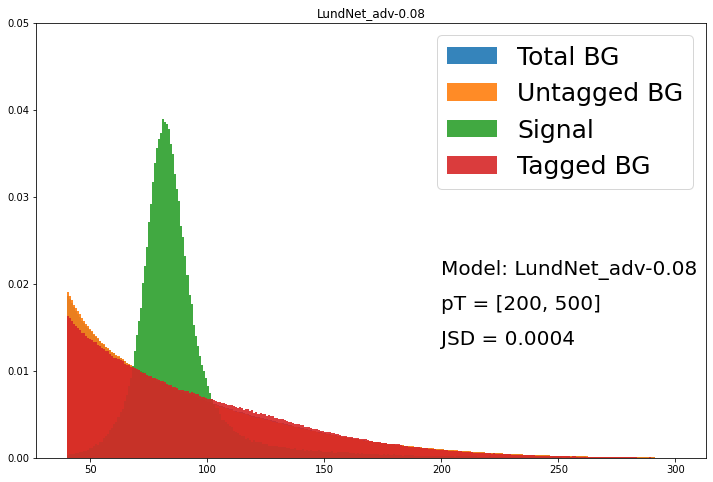

In [18]:
mass_sculpting_ptcut(taggers["LundNet_adv-0.08"],200,500,weight="no_weight")

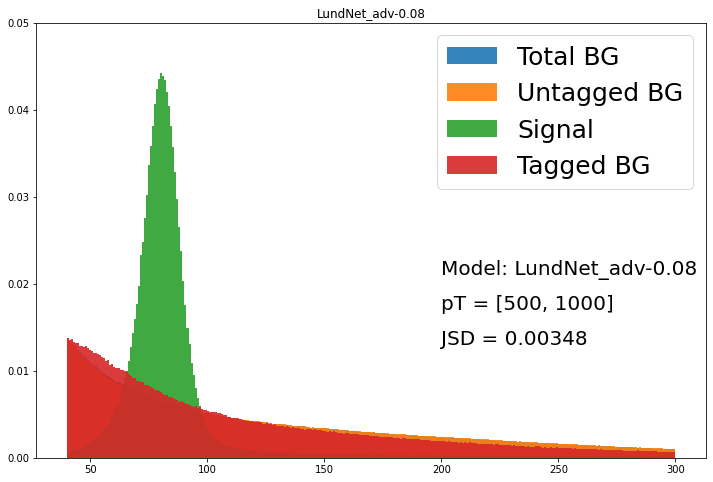

In [19]:
mass_sculpting_ptcut(taggers["LundNet_adv-0.08"],500,1000,weight="no_weight")

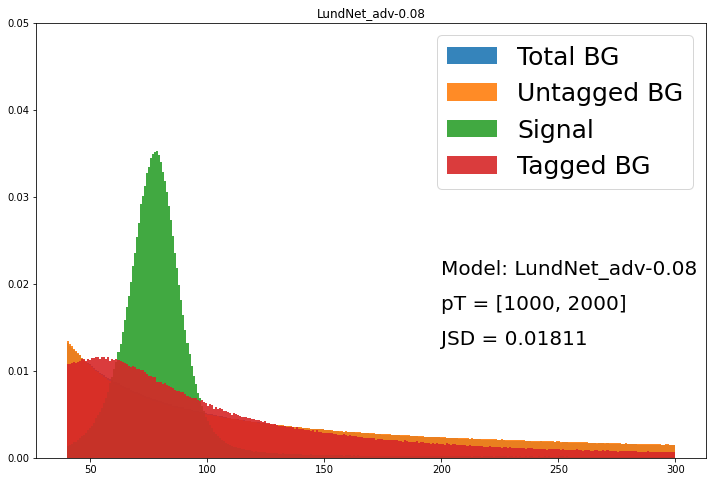

In [20]:
mass_sculpting_ptcut(taggers["LundNet_adv-0.08"],1000,2000,weight="no_weight")

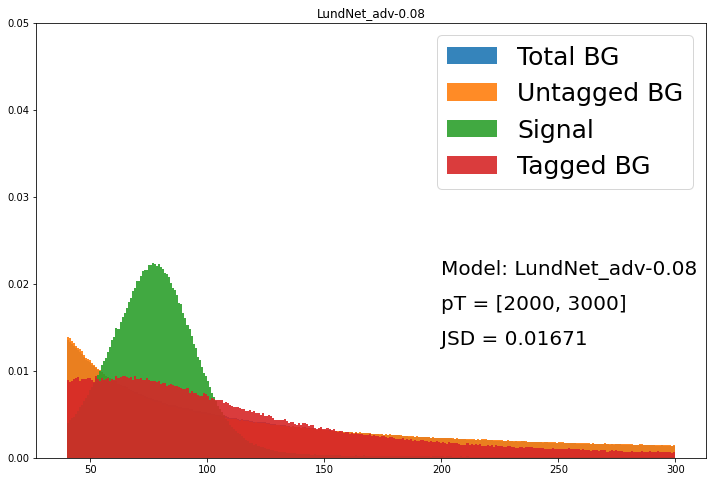

In [21]:
mass_sculpting_ptcut(taggers["LundNet_adv-0.08"],2000,3000,weight="no_weight")

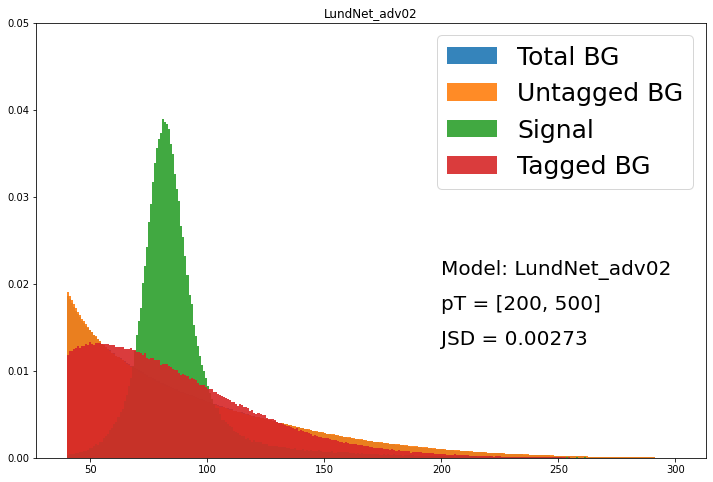

In [54]:
mass_sculpting_ptcut(taggers["LundNet_adv02"],200,500,weight="no_weight")

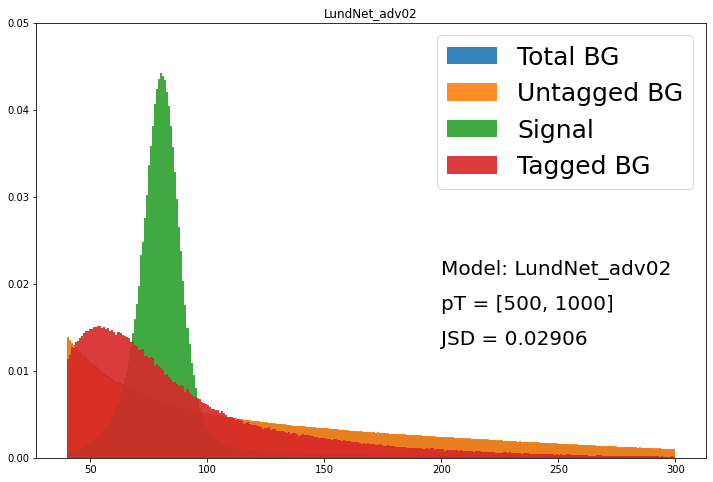

In [55]:
mass_sculpting_ptcut(taggers["LundNet_adv02"],500,1000,weight="no_weight")

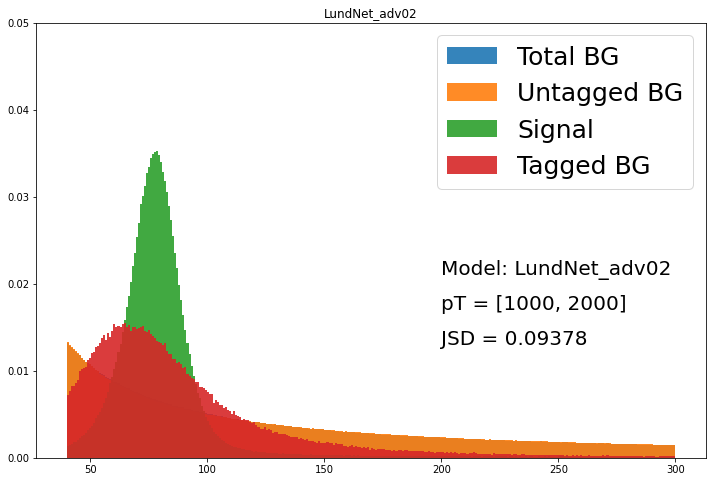

In [56]:
mass_sculpting_ptcut(taggers["LundNet_adv02"],1000,2000,weight="no_weight")

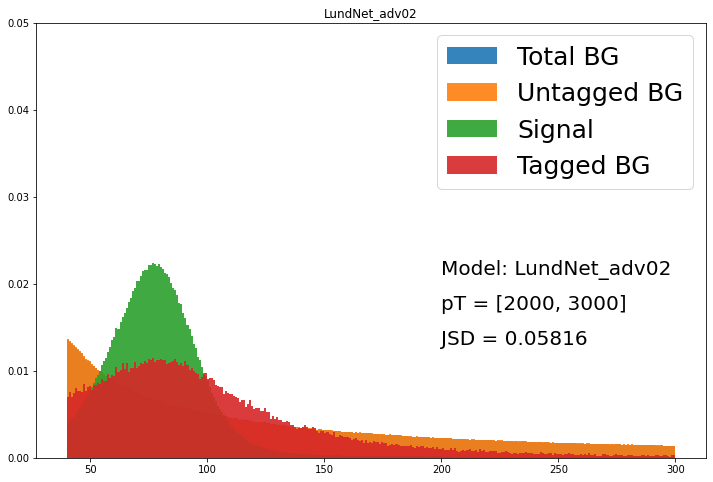

In [57]:
mass_sculpting_ptcut(taggers["LundNet_adv02"],2000,3000,weight="no_weight")

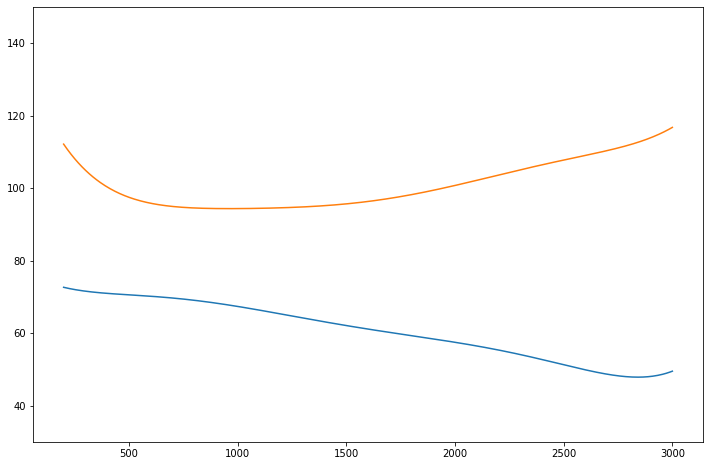

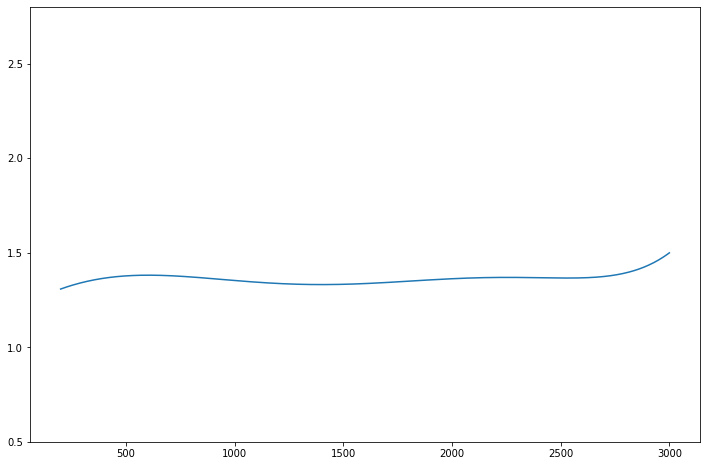

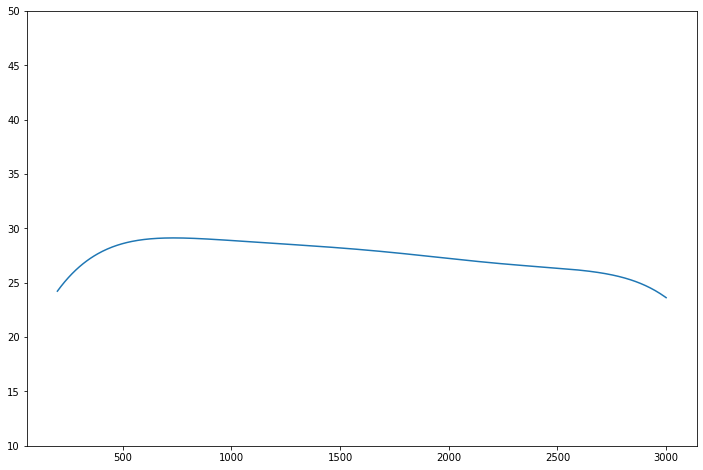

In [4]:
import matplotlib.pyplot as plt

x = np.linspace(200,3000,500)
plt.figure(figsize=[12,8])

#coeffs_mass_high = [143.346574141,-0.226450777605,0.000389338881315,-3.3948387014e-07,1.6059552279e-10,-3.89697376333e-14,3.81538674411e-18]
#coeffs_mass_low = [78.0015279678,-0.0607637891015,0.000154878939873,-1.85055756284e-07,1.06053761725e-10,-2.9181422716e-14,3.09607176224e-18]
#coeffs_d2 = [1.86287598712,-0.00286891844597,6.51440728353e-06,-7.14076683933e-09,3.97453495445e-12,-1.07885298604e-15,1.1338084323e-19]
#coeffs_ntrk = [18.1029210508,0.0328710277742,-4.90091461191e-05,3.72086065666e-08,-1.57111307275e-11,3.50912856537e-15,-3.2345326821e-19]

coeffs_mass_low = [77.85195198272105,-0.04190870755297197,0.00010148243081053968,-1.2646715469383716e-07,7.579631867406234e-11,-2.1810858771189926e-14,2.4131259557938418e-18]
coeffs_mass_high = [138.40389824173184,-0.1841270515643543,0.0003150778420142889,-2.8146937922756945e-07,1.3687749824011263e-10,-3.370270044494874e-14,3.2886002834089895e-18]
coeffs_d2 = [1.1962224520689877,0.0007051153225402016,-7.368355018553183e-07,-5.841704226982689e-11,4.1301607038564777e-13,-1.933293321407319e-16,2.7326862198181657e-20]
coeffs_ntrk = [15.838972910273808,0.059376592913538105,-0.00010408419300237432,9.238395877087256e-08,-4.458514804353202e-11,1.1054941188725808e-14,-1.1013796203558003e-18]

mlow = coeffs_mass_low[0]+x*coeffs_mass_low[1]+coeffs_mass_low[2]*x**2+coeffs_mass_low[3]*x**3+coeffs_mass_low[4]*x**4+coeffs_mass_low[5]*x**5+coeffs_mass_low[6]*x**6
mhigh = coeffs_mass_high[0]+x*coeffs_mass_high[1]+coeffs_mass_high[2]*x**2+coeffs_mass_high[3]*x**3+coeffs_mass_high[4]*x**4+coeffs_mass_high[5]*x**5+coeffs_mass_high[6]*x**6
plt.plot(x, mlow)
plt.plot(x, mhigh)
plt.ylim(30,150)

plt.show()
plt.figure(figsize=[12,8])

d2 = coeffs_d2[0]+x*coeffs_d2[1]+coeffs_d2[2]*x**2+coeffs_d2[3]*x**3+coeffs_d2[4]*x**4+coeffs_d2[5]*x**5+coeffs_d2[6]*x**6
plt.plot(x, d2)
plt.ylim(0.5,2.8)
plt.show()
plt.figure(figsize=[12,8])

ntrk = coeffs_ntrk[0]+x*coeffs_ntrk[1]+coeffs_ntrk[2]*x**2+coeffs_ntrk[3]*x**3+coeffs_ntrk[4]*x**4+coeffs_ntrk[5]*x**5+coeffs_ntrk[6]*x**6
plt.plot(x, ntrk)
plt.ylim(10,50)

plt.show()


In [ ]:
k = [1,2,3,4,5]
m = [5]

In [ ]:
m.extend([k[4]])

In [ ]:
m

In [ ]:
k

In [ ]:
k[1::3]

In [ ]:
k[3:]+k[:2]

In [ ]:
n = 1

In [ ]:
k[:n]+k[n+1:]

In [ ]:
k = "sdfsdf"

In [ ]:
if k[3].isalpha:
    print(k[3].capitalize())
    print ("huy")

In [ ]:
k = ["a","b","c"]

In [ ]:
"".join(k)

In [ ]:
n=[i for i in k i.join()]

In [ ]:
m = [x for x.join() in k]

In [ ]:
15%5

In [ ]:
15%3

In [ ]:
15%4

In [ ]:
k.index("b")

In [ ]:
for k in range(17):
    print (bin(k))

In [ ]:
for k in range(5):
    print (k)

In [ ]:
1^2

In [ ]:
423^2

In [ ]:
2^2

In [ ]:
4556^4556

In [ ]:
2^3

In [ ]:
sentence = "asdfsdfasdfds"

In [ ]:
k[2]

In [ ]:
for x in range(0,len(sentence)-2):
    print (sentence[x],sentence[x+1])

In [ ]:
"a" > "b"

In [ ]:
"A" > " "

In [ ]:
"a".upper()

In [ ]:
"a".join("b")